# Gravitational orbits in Cartesian coordinates

Make a notebook that solves the two-body problem for gravitational
attraction between two bodies in Cartesian coordinates. This will 
require x and y coordinates for both bodies and the use of the 
Lagrangian method. This method was later broken down in the class Orbit
in terms of its y and x legrendre components. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [7]:
class Orbit:
    
    def __init__(self, G=1, m1=1, m2=2):
        # Defining subjective conditions for m1 and m2. 
        self.G = G
        self.m1 = m1
        self.m2 = m2
        
    def dz_dt(self, t, z):
        """
        Parameters
        ----------
        t : float
            time 
        z : float
            There are eight equations in total as seen below.
            z[0] = x1(t) and z[1] = x_dot_1(t),
            z[2] = y1(t) and z[3] = y_dot_1(t),
            z[4] = x2(t) and z[5] = x_dot_2(t),
            z[6] = y2(t) and z[7] = y_dot_2(t),
        r_12 : Pontential energy for gravitional force
        """
        r_12 = np.sqrt((z[0]-z[4])**2 + (z[2]-z[6])**2)
        return [z[1], self.G * self.m2 * (z[4] - z[0]) / r_12**3,\
                z[3], (self.G * self.m2 * (-z[2] + z[6]) / r_12**3),\
                z[5], self.G * self.m1 * (-z[4] + z[0]) / r_12**3,\
                z[7], (self.G * self.m1 * (-z[6] + z[2])) / r_12**3,]
    
    
    def solve_ode(self, t_pts, x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot,
                  method='RK23',
                  abserr=1.0e-8, relerr=1.0e-8):
        """
        Solve the ODE given initial conditions.
        Use solve_ivp with the option of specifying the method.
        Specify smaller abserr and relerr to get more precision.
        """
        z = [x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot]  
        solution = solve_ivp(self.dz_dt, (t_pts[0], t_pts[-1]), 
                             z, t_eval=t_pts, method=method, 
                             atol=abserr, rtol=relerr)
        x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = solution.y
        return x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot

In [4]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

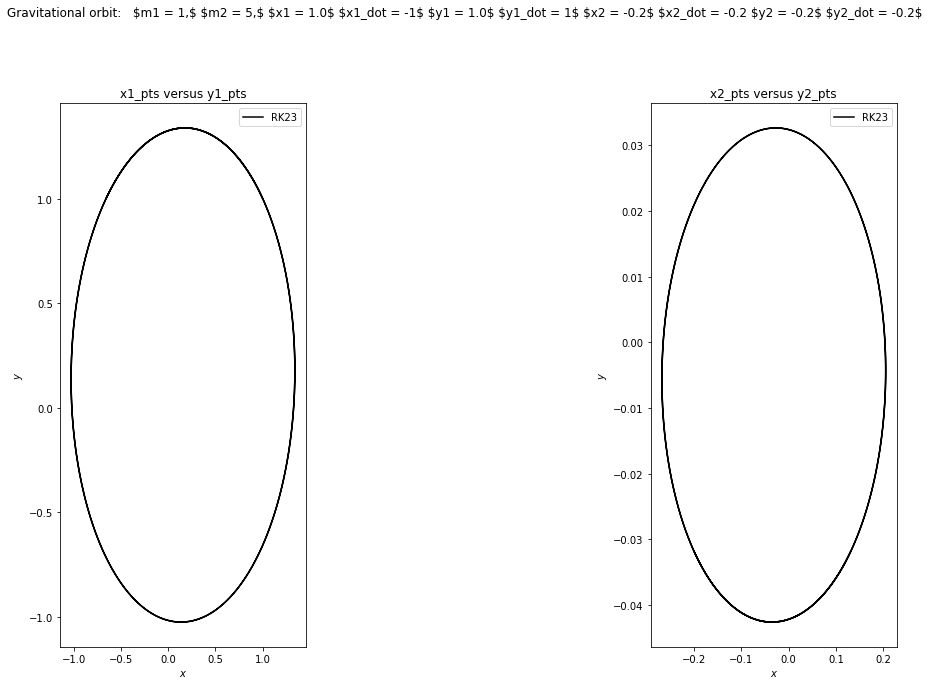

In [37]:
# Initial Conditions for G, mass 1, and mass 2.
# These numbers were arbitrary 
G=1.
m1=1.
m2=5.
o1 = Orbit(G=G, m1=m1, m2=m2)

# Plotting time 
t_start = 0.
t_end = 10.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Initial conditions
x1 = 1.
x1_dot = -1. 
y1 = 1. 
y1_dot = 1.
fac = m1/m2
x2 = -fac * x1
x2_dot = -fac * x1_dot
y2 = -fac * y1
y2_dot = -fac * y1_dot

x1_pts, x1_dot_pts,\
y1_pts, y1_dot_pts,\
x2_pts, x2_dot_pts,\
y2_pts, y2_dot_pts = o1.solve_ode(t_pts,x1,x1_dot,y1,y1_dot,x2,x2_dot,y2,y2_dot)

fig_4 = plt.figure(figsize=(15,10))
overall_title = 'Gravitational orbit:  ' + \
                rf' $m1 = {1},$' + \
                rf' $m2 = {5},$' + \
                rf' $x1 = {x1}$' + \
                rf' $x1_dot = {-1}$' + \
                rf' $y1 = {y1}$' + \
                rf' $y1_dot = {1}$' + \
                rf' $x2 = {x2}$' + \
                rf' $x2_dot = {-0.2}' + \
                rf' $y2 = {y2}$' + \
                rf' $y2_dot = {-0.2}$' + \
                '\n'
fig_4.suptitle(overall_title, va='baseline')

# Graphing pts for both x and y
ax_4a = fig_4.add_subplot(1,3,1)
ax_4a.plot(x1_pts, y1_pts, color='black', label='RK23')
ax_4a.set_xlabel(r'$x$')
ax_4a.set_ylabel(r'$y$')
ax_4a.set_title('x1_pts versus y1_pts')
ax_4a.legend()

ax_4b = fig_4.add_subplot(1,3,3)
ax_4b.plot(x2_pts, y2_pts/(2.*np.pi), color='black', label='RK23')
ax_4b.set_xlabel(r'$x$')
ax_4b.set_ylabel(r'$y$')
ax_4b.set_title('x2_pts versus y2_pts')
ax_4b.legend()
